In [1]:
# Import the FOOOF object
import os
from fooof import FOOOF
import pandas as pd
import numpy as np
from scipy.stats import spearmanr
from fooof import FOOOF, FOOOFGroup
from fooof.plts.spectra import plot_spectra
from fooof.plts.annotate import plot_annotated_model
from fooof.plts.aperiodic import plot_aperiodic_params
from fooof.sim.params import Stepper, param_iter
from fooof.sim import gen_power_spectrum, gen_group_power_spectra
from fooof.utils.params import compute_time_constant, compute_knee_frequency
# Import the FOOOFGroup object
from fooof import FOOOFGroup

# Import utilities to manage frequency band definitions
from fooof.bands import Bands
from fooof.analysis import get_band_peak_fg

# Import simulation utilities for making example data
from fooof.sim.gen import gen_group_power_spectra
from fooof.sim.params import param_jitter

# Import plotting function for model parameters and components
from fooof.plts.periodic import plot_peak_fits, plot_peak_params
from fooof.plts.aperiodic import plot_aperiodic_params, plot_aperiodic_fits

In [2]:
# Import the FOOOFGroup object
from fooof import FOOOFGroup

# Import a utility to download and load example data
from fooof.utils.download import load_fooof_data

In [3]:
# Import the group model object
from specparam import SpectralGroupModel

# Import a utility to download and load example data
from specparam.utils.download import load_example_data

In [4]:
help(SpectralGroupModel)

Help on class SpectralGroupModel in module specparam.objs.group:

class SpectralGroupModel(specparam.objs.algorithm.SpectralFitAlgorithm, specparam.objs.base.BaseObject2D)
 |  SpectralGroupModel(*args, **kwargs)
 |  
 |  Model a group of power spectra as a combination of aperiodic and periodic components.
 |  
 |  WARNING: frequency and power values inputs must be in linear space.
 |  
 |  Passing in logged frequencies and/or power spectra is not detected,
 |  and will silently produce incorrect results.
 |  
 |  Parameters
 |  ----------
 |  peak_width_limits : tuple of (float, float), optional, default: (0.5, 12.0)
 |      Limits on possible peak width, in Hz, as (lower_bound, upper_bound).
 |  max_n_peaks : int, optional, default: inf
 |      Maximum number of peaks to fit.
 |  min_peak_height : float, optional, default: 0
 |      Absolute threshold for detecting peaks.
 |      This threshold is defined in absolute units of the power spectrum (log power).
 |  peak_threshold : float,

In [5]:
# Inizializza una lista vuota per memorizzare le frequenze
freqs_list = []


df = pd.read_csv('integrale_normalizzato_psd_epi/J1.csv')


# Aggiungi la prima colonna (frequenze) alla lista
freqs_list.extend(df.iloc[:, 0].values)

# Converti la lista in un array numpy
freqs_array = np.array(freqs_list)

# Specifica il percorso della cartella dove vuoi salvare i file
output_folder = 'data_integrale'

# Assicurati che la cartella esista, altrimenti creala
os.makedirs(output_folder, exist_ok=True)
# Salva l'array numpy come file .npy
np.save('data_integrale/group_freqs.npy', freqs_array)


In [6]:
# Inizializza una lista vuota per memorizzare gli spettri di potenza
powers_list = []

# Percorri tutti i file CSV nella tua cartella
for filename in os.listdir('integrale_normalizzato_psd_epi'):
    if filename.endswith('.csv'):
        # Leggi il file CSV
        df = pd.read_csv(os.path.join('integrale_normalizzato_psd_epi', filename))
        
        # Aggiungi la seconda colonna (spettro di potenza) alla lista
        powers_list.append(df.iloc[:, 1].values)

# Converti la lista in un array numpy
powers_array = np.array(powers_list)

# Salva l'array numpy come file .npy
np.save('data_integrale/group_powers.npy', powers_array)


In [7]:
# Carica l'array numpy dal file .npy
powers_array = np.load('data_integrale/group_powers.npy')

print(powers_array)

[[2.69066122e-01 2.51691052e-01 1.18597914e-01 ... 1.82682685e-06
  1.82650056e-06 1.82631932e-06]
 [1.81223518e-01 2.74735368e-01 1.28473825e-01 ... 1.85846868e-06
  1.85813720e-06 1.85795308e-06]
 [1.93486982e-01 3.65802729e-01 1.25733287e-01 ... 1.89147727e-06
  1.89114009e-06 1.89095280e-06]
 ...
 [2.27447850e-01 3.18051352e-01 1.00280180e-01 ... 1.89946528e-06
  1.89912682e-06 1.89893882e-06]
 [1.86005442e-01 1.99130594e-01 1.26006677e-01 ... 1.87614068e-06
  1.87580562e-06 1.87561952e-06]
 [1.70547561e-01 1.72409947e-01 1.60378201e-01 ... 1.95554275e-06
  1.95519422e-06 1.95500063e-06]]


In [8]:
freq_array = np.load('data_integrale/group_freqs.npy')
print(freq_array)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 245 24

In [9]:
# Load examples data files needed for this example
freqs = load_fooof_data('group_freqs.npy', folder = 'data_integrale')
spectra = load_fooof_data('group_powers.npy', folder = 'data_integrale')

In [10]:
# Check the shape of the loaded data
print(freqs.shape)
print(spectra.shape)

(250,)
(52, 250)


In [11]:
# Initialize a SpectralGroupModel object, which accepts all the same settings as SpectralModel
fg1 = SpectralGroupModel(peak_width_limits=(0.5,1.5), min_peak_height=0.4)

###################################################################################################

# Fit a group of power spectra with the .fit() method
#  The key difference (compared to SpectralModel) is that it takes a 2D array of spectra
#     This matrix should have the shape of [n_spectra, n_freqs]
fg1.fit(freqs, spectra, [0, 150])

###################################################################################################

# Print out results
fg1.print_results()



FITTING WARNING: Skipping frequency == 0, as this causes a problem with fitting.
Fitting model across 52 power spectra.

	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                          GROUP RESULTS                                           
                                                                                                  
                             Number of power spectra in the Group: 52                             
                                                                                                  
                       The model was run on the frequency range 1 - 150 Hz                        
                           

[FitResults(aperiodic_params=array([-0.16042581,  2.42014708]), peak_params=array([[ 4.68309329,  0.60865172,  1.5       ],
       [ 7.39156076,  0.71907198,  1.5       ],
       [ 9.51780698,  0.92552916,  1.5       ],
       [11.66326615,  0.83003832,  1.5       ],
       [14.29170249,  0.56105201,  1.5       ],
       [79.66866924,  0.52901253,  1.5       ],
       [82.59906597,  0.6291173 ,  1.5       ],
       [85.34441986,  0.6986984 ,  1.5       ],
       [87.9426322 ,  0.73780069,  1.5       ],
       [90.58148842,  0.57970007,  1.5       ],
       [93.51944516,  0.4789643 ,  1.5       ]]), r_squared=0.9892207451362939, error=0.08738241555978457, gaussian_params=array([[ 4.68309329,  0.65997641,  0.75      ],
       [ 7.39156076,  0.81340131,  0.75      ],
       [ 9.51780698,  1.04027955,  0.75      ],
       [11.66326615,  0.90704286,  0.75      ],
       [14.29170249,  0.59750283,  0.75      ],
       [79.66866924,  0.58128154,  0.75      ],
       [82.59906597,  0.71899309,

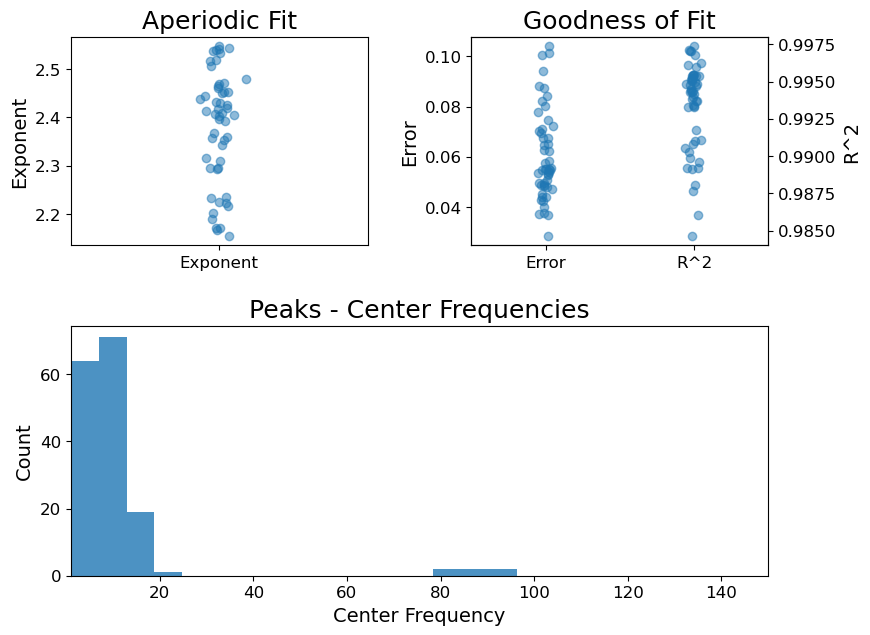

In [12]:
# Plot a summary of the results across the group
fg1.plot()

###################################################################################################
#
# Just as with the SpectralModel object, you can call the convenience method
# :meth:`specparam.SpectralGroupModel.report` to run the fitting, and then print the results and plots.
#

###################################################################################################

# You can also save out PDF reports of the group fits, same as for an individual model
#fg1.save_report('report/10_group_report_epi')

###################################################################################################
# Group Results
# -------------
#
# The group model object collects fits across power spectra, and stores them in an attribute
# called ``group_results``, which is a list of FitResults objects.
#

###################################################################################################

# Check out some of the results stored in 'group_results'
print(fg1.group_results[0:2])

###################################################################################################
# get_params
# ~~~~~~~~~~
#
# To collect results from across all model fits, and to select specific parameters
# you can use the :func:`~specparam.SpectralGroupModel.get_params` method.
#
# This method works the same as in the :class:`~specparam.SpectralModel` object, and lets you extract
# specific results by specifying a field, as a string, and (optionally) a specific column
# to extract.
#
# Since the :class:`~specparam.SpectralGroupModel` object collects results from across multiple model fits,
# you should always use :func:`~specparam.SpectralGroupModel.get_params` to access model parameters.
# The results attributes introduced with the SpectralModel object (such as `aperiodic_params_` or
# `peak_params_`) do not store results across the group, as they are defined for individual
# model fits (and used internally as such by the SpectralGroupModel object).
#

###################################################################################################

# Extract aperiodic parameters
aps_1 = fg1.get_params('aperiodic_params')
exps = fg1.get_params('aperiodic_params', 'exponent')

# Extract peak parameters
peaks_1 = fg1.get_params('peak_params')
cfs = fg1.get_params('peak_params', 'CF')

# Extract goodness-of-fit metrics
errors = fg1.get_params('error')
r2s = fg1.get_params('r_squared')

###################################################################################################

# The full list of parameters you can extract is available in the documentation of `get_params`
print(fg1.get_params.__doc__)


In [13]:
# Crea un DataFrame con i picchi
df = pd.DataFrame(aps_1)
print(df)

# Aggiungi una colonna con il nome del canale

output_folder='distribuzione dati'

# Salva il DataFrame in un file CSV nella cartella di destinazione
df.to_csv(os.path.join(output_folder, 'aps_epi_integrale' ), index=False)

           0         1
0  -0.160426  2.420147
1  -0.156512  2.450766
2  -0.138009  2.438433
3  -0.362657  2.352490
4  -0.315464  2.397053
5  -0.098555  2.518735
6  -0.170170  2.367665
7  -0.665766  2.232249
8  -0.764331  2.201277
9  -0.708647  2.225220
10 -0.843386  2.154900
11 -0.770332  2.171669
12 -0.003202  2.537456
13  0.077995  2.516350
14 -0.211657  2.461196
15 -0.249614  2.413695
16 -0.511641  2.310058
17 -0.188930  2.404066
18 -0.094387  2.465034
19 -0.431955  2.343673
20 -0.077035  2.356963
21 -0.022517  2.424859
22 -0.108335  2.391725
23 -0.353084  2.316583
24 -0.515501  2.295368
25  0.055654  2.505939
26  0.084841  2.547338
27  0.118246  2.540331
28  0.094941  2.541043
29 -0.117832  2.470195
30 -0.233792  2.428855
31 -0.701075  2.223660
32 -0.267552  2.401935
33 -0.699252  2.188655
34 -0.536333  2.294114
35 -0.314598  2.409676
36 -0.708684  2.234978
37 -0.499373  2.294575
38 -0.170651  2.431058
39 -0.026442  2.416869
40 -0.031104  2.452283
41 -0.262062  2.406054
42  0.06213

In [14]:
#Crea un DataFrame con i picchi
df = pd.DataFrame(peaks_1, columns=['CF', 'Amp', 'BW', 'Filename'])

# Aggiungi una colonna con il nome del canale

output_folder='distribuzione dati'

# Salva il DataFrame in un file CSV nella cartella di destinazione
df.to_csv(os.path.join(output_folder, '10_epi_integrale' ), index=False)

In [15]:
# Inizializza una lista vuota per memorizzare gli spettri di potenza
powers_list_n = []

# Percorri tutti i file CSV nella tua cartella
for filename in os.listdir('integrale_normalizzato_psd_non_epi'):
    if filename.endswith('.csv'):
        # Leggi il file CSV
        df = pd.read_csv(os.path.join('integrale_normalizzato_psd_non_epi', filename))
        
        # Aggiungi la seconda colonna (spettro di potenza) alla lista
        powers_list_n.append(df.iloc[:, 1].values)

# Converti la lista in un array numpy
powers_array_n = np.array(powers_list_n)

# Salva l'array numpy come file .npy
np.save('data_integrale/group_powers_n.npy', powers_array_n)

In [16]:
# Load examples data files needed for this example
freqs = load_fooof_data('group_freqs.npy', folder= 'data_integrale')
spectra_n = load_fooof_data('group_powers_n.npy', folder='data_integrale')

In [17]:
# Initialize a SpectralGroupModel object, which accepts all the same settings as SpectralModel
fg0 = SpectralGroupModel(peak_width_limits=(0.5,1.5), min_peak_height=0.4)

###################################################################################################

# Fit a group of power spectra with the .fit() method
#  The key difference (compared to SpectralModel) is that it takes a 2D array of spectra
#     This matrix should have the shape of [n_spectra, n_freqs]
fg0.fit(freqs, spectra_n, [0.5, 150])

###################################################################################################

# Print out results
fg0.print_results()


Fitting model across 119 power spectra.

	Lower bounds below frequency-resolution have no effect (effective lower bound is the frequency resolution).
	Too low a limit may lead to overfitting noise as small bandwidth peaks.
	We recommend a lower bound of approximately 2x the frequency resolution.

                                                                                                  
                                          GROUP RESULTS                                           
                                                                                                  
                            Number of power spectra in the Group: 119                             
                                                                                                  
                       The model was run on the frequency range 1 - 150 Hz                        
                                 Frequency Resolution is 1.00 Hz                                  
         

[FitResults(aperiodic_params=array([0.01885695, 2.44274735]), peak_params=array([[4.64754456, 0.79065197, 1.5       ],
       [7.06603744, 1.0030616 , 1.5       ]]), r_squared=0.9925576701263312, error=0.05593641702838149, gaussian_params=array([[4.64754456, 0.85781624, 0.75      ],
       [7.06603744, 1.00066645, 0.75      ]])), FitResults(aperiodic_params=array([-0.28623066,  2.40647998]), peak_params=array([[ 3.46209938,  0.45174259,  1.36102403],
       [ 5.32636552,  0.86436866,  1.5       ],
       [ 7.26084226,  1.6090291 ,  1.5       ],
       [ 9.48198565,  0.71549752,  1.5       ],
       [11.51492888,  0.71215073,  1.5       ],
       [13.61342337,  0.90362276,  1.5       ],
       [15.56957517,  0.7060382 ,  1.5       ],
       [18.54425119,  0.49795441,  1.5       ]]), r_squared=0.993744709438232, error=0.05315597870817859, gaussian_params=array([[ 3.46209938,  0.55981986,  0.68051202],
       [ 5.32636552,  0.88328837,  0.75      ],
       [ 7.26084226,  1.62823839,  0.75

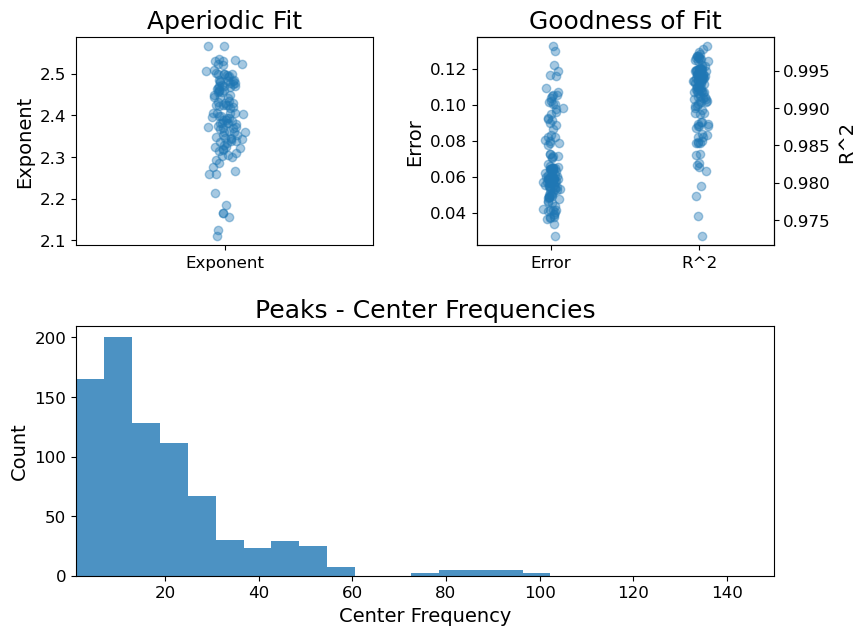

In [18]:

# Plot a summary of the results across the group
fg0.plot()

###################################################################################################
#
# Just as with the SpectralModel object, you can call the convenience method
# :meth:`specparam.SpectralGroupModel.report` to run the fitting, and then print the results and plots.
#

###################################################################################################

# You can also save out PDF reports of the group fits, same as for an individual model
#fg0.save_report('Report/10_NO_group_report_non')

###################################################################################################
# Group Results
# -------------
#
# The group model object collects fits across power spectra, and stores them in an attribute
# called ``group_results``, which is a list of FitResults objects.
#

###################################################################################################

# Check out some of the results stored in 'group_results'
print(fg0.group_results[0:2])

###################################################################################################
# get_params
# ~~~~~~~~~~
#
# To collect results from across all model fits, and to select specific parameters
# you can use the :func:`~specparam.SpectralGroupModel.get_params` method.
#
# This method works the same as in the :class:`~specparam.SpectralModel` object, and lets you extract
# specific results by specifying a field, as a string, and (optionally) a specific column
# to extract.
#
# Since the :class:`~specparam.SpectralGroupModel` object collects results from across multiple model fits,
# you should always use :func:`~specparam.SpectralGroupModel.get_params` to access model parameters.
# The results attributes introduced with the SpectralModel object (such as `aperiodic_params_` or
# `peak_params_`) do not store results across the group, as they are defined for individual
# model fits (and used internally as such by the SpectralGroupModel object).
#

###################################################################################################

# Extract aperiodic parameters
aps_0 = fg0.get_params('aperiodic_params')
exps = fg0.get_params('aperiodic_params', 'exponent')

# Extract peak parameters
peaks_0 = fg0.get_params('peak_params')
cfs = fg0.get_params('peak_params', 'CF')

# Extract goodness-of-fit metrics
errors = fg0.get_params('error')
r2s = fg0.get_params('r_squared')

###################################################################################################

# The full list of parameters you can extract is available in the documentation of `get_params`
print(fg0.get_params.__doc__)

In [19]:
#Crea un DataFrame con i picchi
df = pd.DataFrame(peaks_0, columns=['CF', 'Amp', 'BW', 'Filename'])

# Aggiungi una colonna con il nome del canale

output_folder='distribuzione dati'

# Salva il DataFrame in un file CSV nella cartella di destinazione
df.to_csv(os.path.join(output_folder, '10_non_epi_integrale' ), index=False)

In [20]:
# Crea un DataFrame con i picchi
df = pd.DataFrame(aps_0)
print(df)

# Aggiungi una colonna con il nome del canale

output_folder='distribuzione dati'

# Salva il DataFrame in un file CSV nella cartella di destinazione
df.to_csv(os.path.join(output_folder, 'aps_non_epi_integrale' ), index=False)

            0         1
0    0.018857  2.442747
1   -0.286231  2.406480
2   -0.348638  2.388487
3   -0.086372  2.471320
4   -0.029374  2.499872
..        ...       ...
114 -0.783226  2.183347
115 -0.836932  2.165958
116 -0.839954  2.165755
117 -0.740481  2.214242
118 -0.563625  2.299571

[119 rows x 2 columns]


In [21]:
# Path della cartella contenente i file
folder_path = "integrale_normalizzato_psd_epi"

# Ottenere la lista dei file nella cartella e ordinarli
file_list = sorted(os.listdir(folder_path))

# Dizionario che mappa il numero del canale al nome del file
channel_to_filename = {i: os.path.splitext(file)[0] for i, file in enumerate(file_list)}

print(file_list)
# Specifica il percorso della cartella dove vuoi salvare i file
output_folder = 'peaks_EPI_integrale'

# Assicurati che la cartella esista, altrimenti creala
os.makedirs(output_folder, exist_ok=True)

for channel in np.unique(peaks_1[:, -1]):
    # Filtrare le righe corrispondenti al canale corrente
    channel_matrix = peaks_1[peaks_1[:, -1] == channel]

    # Ottenere il nome del file corrispondente al canale
    filename = channel_to_filename.get(int(channel), f'channel_{int(channel)}')

    # Salvare la matrice filtrata in un file CSV all'interno della cartella specificata
    df = pd.DataFrame(channel_matrix)
    df.to_csv(os.path.join(output_folder, f'{filename}.csv'), index=False, header=False)


print("Le matrici sono state salvate nei rispettivi file CSV.")


['J1.csv', 'J2.csv', 'J3.csv', 'J4.csv', 'J5.csv', 'L1.csv', 'L10.csv', 'L11.csv', 'L12.csv', 'L13.csv', 'L14.csv', 'L15.csv', 'L2.csv', 'L3.csv', 'L4.csv', 'L5.csv', 'L6.csv', 'L7.csv', 'L8.csv', 'L9.csv', 'M1.csv', 'M2.csv', 'M3.csv', 'M4.csv', 'M5.csv', 'N1.csv', 'N2.csv', 'N3.csv', 'N4.csv', 'N5.csv', 'N6.csv', 'O10.csv', 'O11.csv', 'O13.csv', 'O5.csv', 'O6.csv', 'O7.csv', 'O8.csv', 'O9.csv', 'R1.csv', 'R2.csv', 'R3.csv', 'X1.csv', 'X2.csv', 'X3.csv', 'X4.csv', 'Z1.csv', 'Z2.csv', 'Z3.csv', 'Z4.csv', 'Z5.csv', 'Z6.csv']
Le matrici sono state salvate nei rispettivi file CSV.


In [22]:
# Path della cartella contenente i file
folder_path = "integrale_normalizzato_psd_non_epi"

# Ottenere la lista dei file nella cartella e ordinarli
file_list = sorted(os.listdir(folder_path))

# Dizionario che mappa il numero del canale al nome del file
channel_to_filename = {i: os.path.splitext(file)[0] for i, file in enumerate(file_list)}


# Specifica il percorso della cartella dove vuoi salvare i file
output_folder = 'peaks_NON_EPI_integrale'

# Assicurati che la cartella esista, altrimenti creala
os.makedirs(output_folder, exist_ok=True)

for channel in np.unique(peaks_0[:, -1]):
    # Filtrare le righe corrispondenti al canale corrente
    channel_matrix = peaks_0[peaks_0[:, -1] == channel]

    # Ottenere il nome del file corrispondente al canale
    filename = channel_to_filename.get(int(channel), f'channel_{int(channel)}')

    # Salvare la matrice filtrata in un file CSV all'interno della cartella specificata
    df = pd.DataFrame(channel_matrix)
    df.to_csv(os.path.join(output_folder, f'{filename}.csv'), index=False, header=False)


print("Le matrici sono state salvate nei rispettivi file CSV.")


Le matrici sono state salvate nei rispettivi file CSV.


In [23]:
# Path della cartella contenente i file
folder_path = "integrale_normalizzato_psd_epi"

# Ottenere la lista dei file nella cartella e ordinarli
file_list = sorted(os.listdir(folder_path))

# Specifica il percorso della cartella dove vuoi salvare i file
output_folder = 'aps_epi_integrale'

# Assicurati che la cartella esista, altrimenti creala
os.makedirs(output_folder, exist_ok=True)

# Iterare attraverso ogni elemento della matrice aps_epi e salvarlo con il nome corrispondente
for i, row in enumerate(aps_1):
    # Ottenere il nome del file corrispondente all'indice corrente
    filename = os.path.splitext(file_list[i])[0]
    
    # Salvare la riga corrente in un file CSV all'interno della cartella specificata
    df = pd.DataFrame([row])
    df.to_csv(os.path.join(output_folder, f'{filename}.csv'), index=False, header=False)

print("Le matrici sono state salvate nei rispettivi file CSV.")



Le matrici sono state salvate nei rispettivi file CSV.


In [24]:
# Path della cartella contenente i file
folder_path = "integrale_normalizzato_psd_non_epi"

# Ottenere la lista dei file nella cartella e ordinarli
file_list = sorted(os.listdir(folder_path))

# Specifica il percorso della cartella dove vuoi salvare i file
output_folder = 'aps_non_epi_integrale'

# Assicurati che la cartella esista, altrimenti creala
os.makedirs(output_folder, exist_ok=True)

# Iterare attraverso ogni elemento della matrice aps_epi e salvarlo con il nome corrispondente
for i, row in enumerate(aps_0):
    # Ottenere il nome del file corrispondente all'indice corrente
    filename = os.path.splitext(file_list[i])[0]
    
    # Salvare la riga corrente in un file CSV all'interno della cartella specificata
    df = pd.DataFrame([row])
    df.to_csv(os.path.join(output_folder, f'{filename}.csv'), index=False, header=False)

print("Le matrici sono state salvate nei rispettivi file CSV.")


Le matrici sono state salvate nei rispettivi file CSV.
